### Handwriten digits classification using neural network
In this notebook we will classify hand writen digits using a simple neural network which has only input and output layers. We will than add a hidden layers and see how the performance model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 19s 2us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

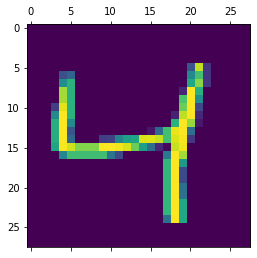

In [8]:
plt.matshow(X_train[2])

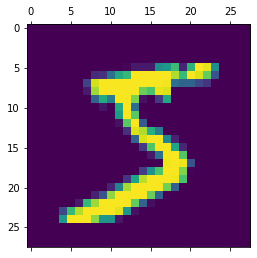

In [9]:
plt.matshow(X_train[0])

In [10]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [23]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

In [25]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 773us/step - loss: 0.4727 - accuracy: 0.87490s - loss: 0.542
Epoch 2/5
1875/1875 [==============================] - 1s 733us/step - loss: 0.3041 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.2837 - accuracy: 0.92040s - loss: 0.2842 - accuracy - ETA: 0s - loss: 0.2832 - accuracy: 0.92
Epoch 4/5
1875/1875 [==============================] - 1s 761us/step - loss: 0.2736 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.2668 - accuracy: 0.9254


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 683us/step - loss: 0.2655 - accuracy: 0.9271


[0.26553866267204285, 0.9271000027656555]

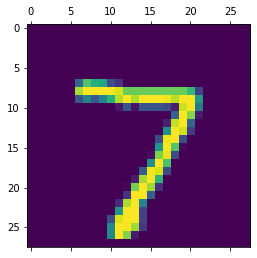

In [28]:
plt.matshow(X_test[0])

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.0896077e-02, 3.4214901e-07, 6.8979084e-02, 9.5216596e-01,
       2.2212565e-03, 1.2621844e-01, 2.4067278e-06, 9.9980342e-01,
       9.5168591e-02, 6.5580672e-01], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [35]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    2,    0,    5,   13,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  933,   13,    9,    3,   14,   10,   34,    4],
       [   2,    0,   25,  913,    1,   25,    4,   11,   21,    8],
       [   1,    1,    3,    0,  915,    0,   14,    4,    9,   35],
       [   9,    3,    2,   27,    9,  774,   23,    7,   31,    7],
       [   7,    3,    3,    1,    7,    7,  927,    2,    1,    0],
       [   1,    5,   23,    6,    8,    0,    0,  955,    2,   28],
       [   5,    9,    7,   18,    8,   23,   13,   13,  872,    6],
       [   9,    7,    1,   10,   29,    7,    1,   26,    6,  913]])>

Text(69.0, 0.5, 'Truth')

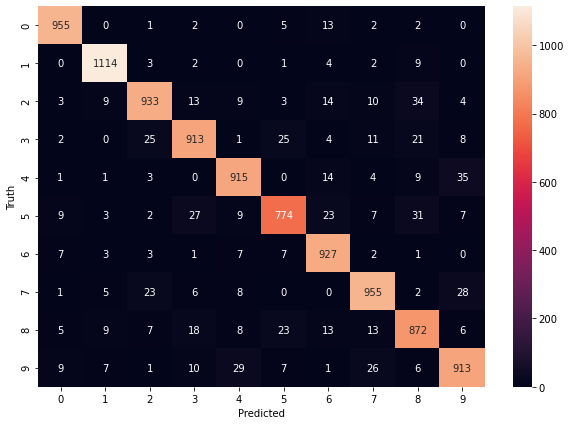

In [36]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.9215: 1s - loss: 0.371 - ETA: 0s - loss: 0.3129 - accuracy:  - ETA: 0s - loss: 0.2996 - 
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1234 - accuracy: 0.9630: 1s - loss: 0.1304 - accuracy: 0.96 - ETA: 1s - loss: 0.1290 -  - E
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0856 - accuracy: 0.9739: 1s - ETA: 0s - loss:
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0662 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0508 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0413 - accuracy: 0.9872: 0s - l
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0342 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0275 - accuracy: 0.9914
Ep

In [38]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 786us/step - loss: 0.0751 - accuracy: 0.9786


[0.07513776421546936, 0.978600025177002]

Text(69.0, 0.5, 'Truth')

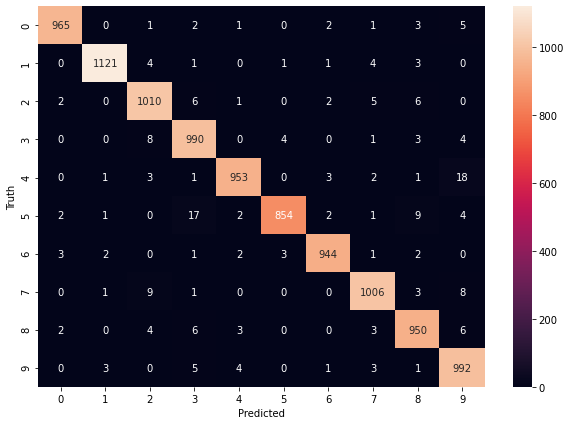

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2605 - accuracy: 0.9240
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.9656
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0784 - accuracy: 0.9757
Epoch 4/20
1875/1875 [==============================] - 2s 999us/step - loss: 0.0596 - accuracy: 0.9814
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0470 - accuracy: 0.9854
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0397 - accuracy: 0.9865
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0315 - accuracy: 0.9897
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0270 - accuracy: 0.9915: 0s - loss: 0.0265 
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 10/20
1875/1875 [==============================] - 2s 

In [42]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 837us/step - loss: 0.1214 - accuracy: 0.9761


[0.12137261033058167, 0.9761000275611877]